# 6.3.2 [실습] 손글씨 숫자 데이터 시각화

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np

## MNIST 데이터 획득

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

## MNIST 데이터 전처리

In [3]:
x_train = x_train.reshape(60000, 784)

x_test = x_test[:300]
y_test = y_test[:300]
x_test = x_test.reshape(300, 784)

x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

gray_scale = 255
x_train /= gray_scale
x_test /= gray_scale

## 텐서플로 모델 만들기

In [ ]:
encoding_dim = 3

input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation="relu")(input_img)
decoded = Dense(784, activation="sigmoid")(encoded)

autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")

In [5]:
autoencoder.fit(
    x_train,
    x_train,
    epochs=30,
    batch_size=128,
    shuffle=True,
    validation_data=(x_test, x_test),
)

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4199 - val_loss: 0.2549
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2518 - val_loss: 0.2276
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2328 - val_loss: 0.2217
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2281 - val_loss: 0.2184
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2255 - val_loss: 0.2165
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2234 - val_loss: 0.2145
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2222 - val_loss: 0.2127
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2205 - val_loss: 0.2113
Epoch 9/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2197 - val_loss: 0.2105
Epoch 10/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2192 - val_loss: 0.2099
Epoch 11/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2183 - val_loss: 0.2088
Epoch 12/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

In [6]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [7]:
encoded_imgs

array([[ 3.0143597 , 12.040034  , 12.567829  ],
       [ 8.303004  ,  0.        ,  0.8511405 ],
       [ 9.563948  ,  6.394021  ,  0.20813787],
       [ 7.302466  ,  2.3947685 , 21.629284  ],
       [ 2.3074598 ,  3.5584776 , 11.501518  ],
       [10.524267  ,  7.076209  ,  0.06623721],
       [ 2.9538713 ,  6.274553  , 12.271486  ],
       [ 1.6403539 ,  4.144343  ,  5.3255224 ],
       [ 7.4083242 ,  4.3453355 , 16.972445  ],
       [ 7.8847847 , 12.553675  , 25.594091  ],
       [ 6.430358  ,  0.        , 15.318558  ],
       [ 5.469047  ,  1.704037  , 10.271944  ],
       [ 4.062492  ,  9.671989  , 15.797178  ],
       [ 4.5798006 ,  1.8197656 , 16.78517   ],
       [ 9.943444  ,  7.0000954 ,  0.42730546],
       [ 4.78916   ,  0.6412358 ,  4.8022738 ],
       [ 0.6525607 ,  5.277676  , 11.14789   ],
       [ 0.9571519 ,  9.487026  ,  9.770115  ],
       [ 0.9681668 ,  0.        ,  1.9070017 ],
       [ 3.389965  ,  5.4281855 , 10.745256  ],
       [10.011169  , 10.887011  , 20.456

## 데이터 시각화

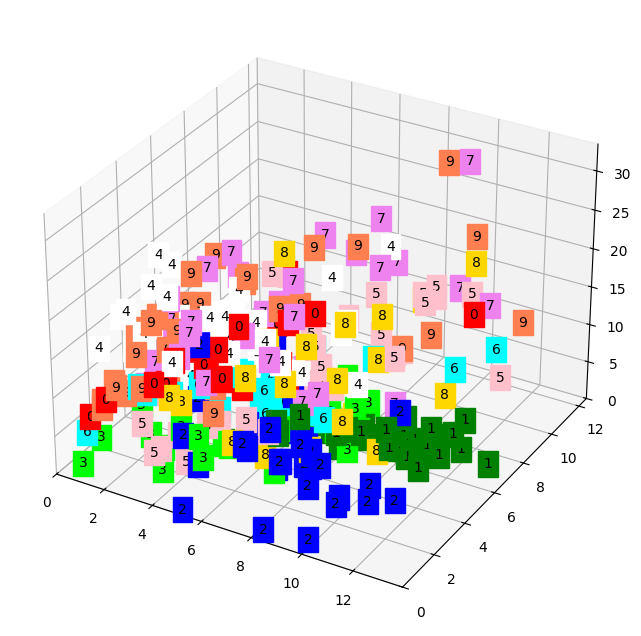

In [19]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')

xs = encoded_imgs[:, 0]
ys = encoded_imgs[:, 1]
zs = encoded_imgs[:, 2]

color = [
    "red",
    "green",
    "blue",
    "lime",
    "white",
    "pink",
    "aqua",
    "violet",
    "gold",
    "coral",
]

for x, y, z, label in zip(xs, ys, zs, y_test):
    c = color[int(label)]
    ax.text(x, y, z, label, backgroundcolor=c)

ax.set_xlim(xs.min(), xs.max())
ax.set_ylim(ys.min(), ys.max())
ax.set_zlim(zs.min(), zs.max())

plt.show()

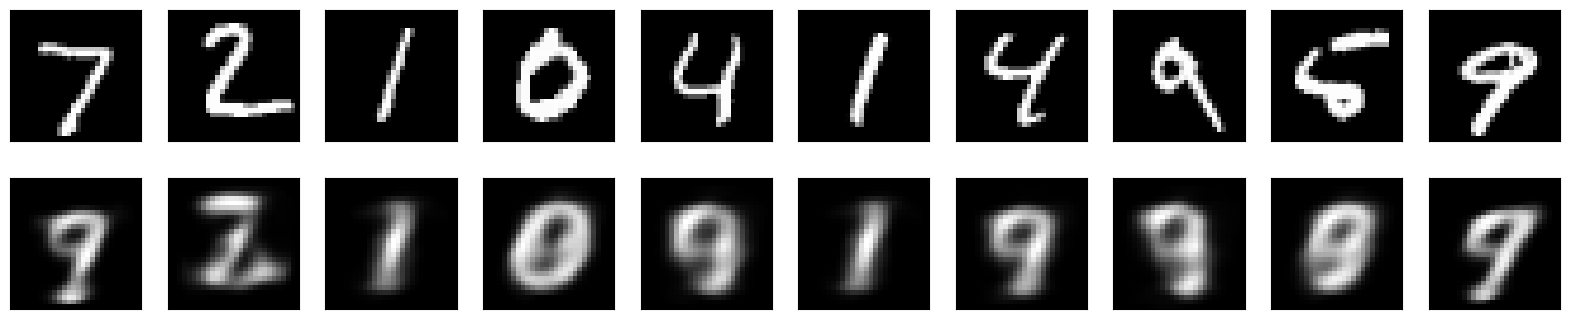

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()